Analysis of 3 replica of metadynamics simulations for unbinding using specific contacts as a CV. The analysis obtains the distancs, hinge helicity, cmap values of specific residues and number if protein DNA hydrogen bonds ans well as protein-protein hydrogen bonds from gromacs analysis. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import numpy as np
import sys
sys.path.append("/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/")
from analysis_scripts import plotting_gmx
from analysis_scripts import analysis_of_CVs
from analysis_scripts import analysis_of_CVs_NMR


In [2]:
#plt.style.use("dark_background")
#sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 1})

In [3]:
folder = "/home/x_mallu/mln_lf/EXP-22-BV4083/data_OSymL/DNA-protein/06-prod/"
topo = folder + "1/1efa_noTet_99sbws_proc_mod_resID.pdb"
folder_unbiases = "/home/x_mallu/mln_lf/EXP-21-BV4028_contains_unbiased/06-unbiased_SymL/"
folder_NMR_OSymL = "/home/x_mallu/mln_lf/EXP-23-BV4094/data_SymL/06-prod/"
folder_1osl = "/home/x_mallu/mln_lf/1OSL_CV_analsyis/"


In [4]:
def read_colvar(path, skiprows = [0,1,2]):
    """ Reads the colvar file and adds a row with the MD time in ps.
    
    """

    colvar = pd.read_csv(path + "COLVAR", sep='\s+', skiprows=1,\
        names=['time (ps)','alpha','cmap','metaD.bias', 'metaD.work',\
               'metaD.acc'])

    colvar["MD time (ps)"] = colvar['time (ps)']*colvar['metaD.acc'].astype(float) 
    colvar['metaD.acc']  = colvar['metaD.acc'].astype(float)
    return(colvar)

In [5]:
#colvar = read_colvar(folder+'1/')
#colvar['replica'] = [1 for x in range(len(colvar))]
#for i in [2,3]:
#    colvar_n = read_colvar(folder+'{}/'.format(i))
#    colvar_n['replica'] = [i for x in range(len(colvar_n))]
#    colvar = colvar.append(colvar_n)

In [6]:
colvar_100 = read_colvar(folder+'1/',skiprows=9999900)
colvar_100['replica'] = [1 for x in range(len(colvar_100))]
for i in [2,3]:
    colvar_n_100 = read_colvar(folder+'{}/'.format(i),skiprows=9999900)
    colvar_n_100['replica'] = [i for x in range(len(colvar_n_100))]
    colvar_100 = colvar_100.append(colvar_n_100)


KeyboardInterrupt



In [ ]:
colvar_100.mean(), colvar_100.std()/3

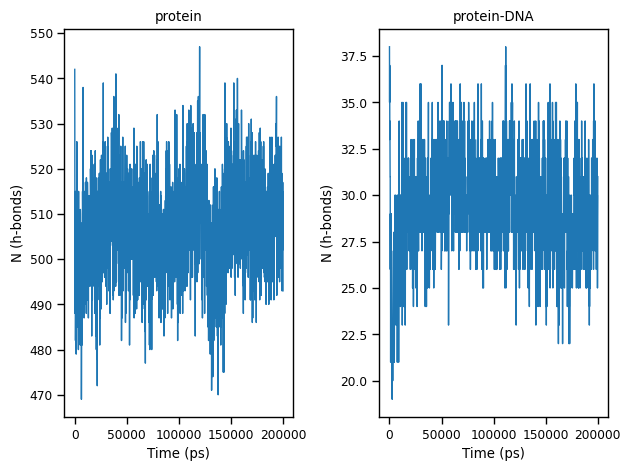

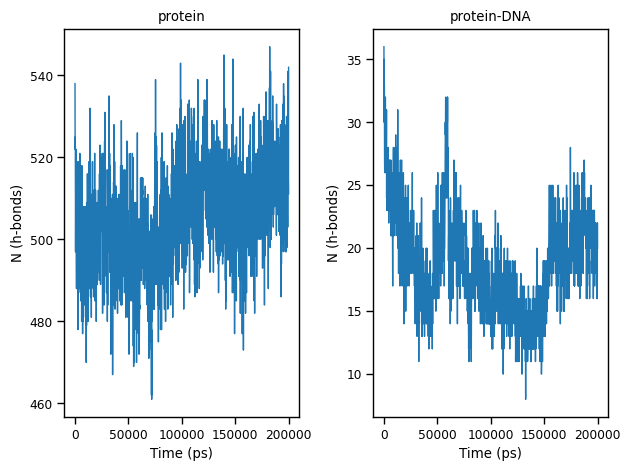

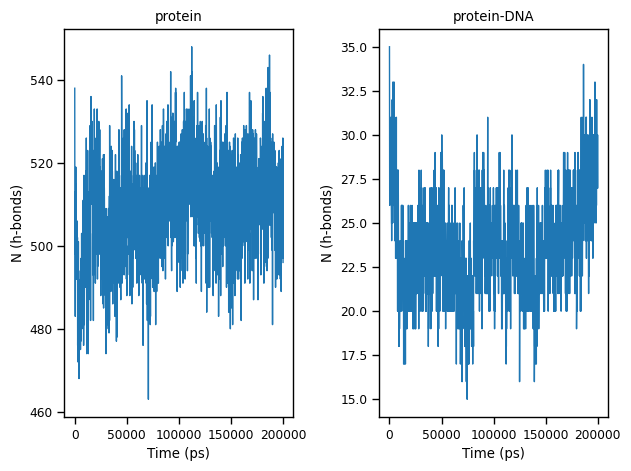

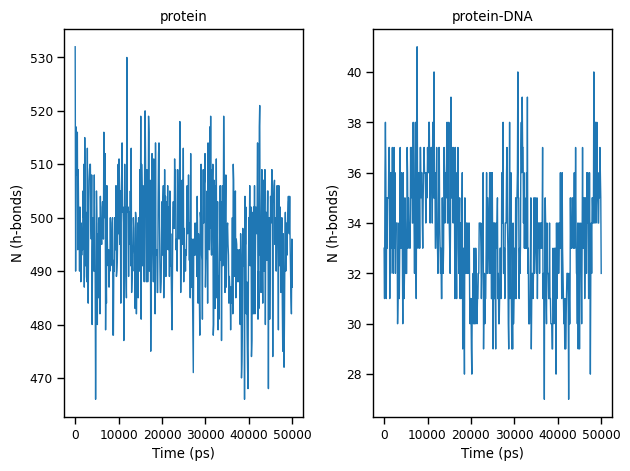

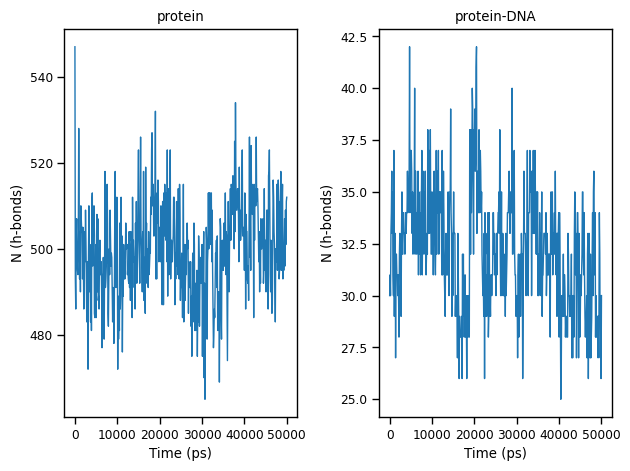

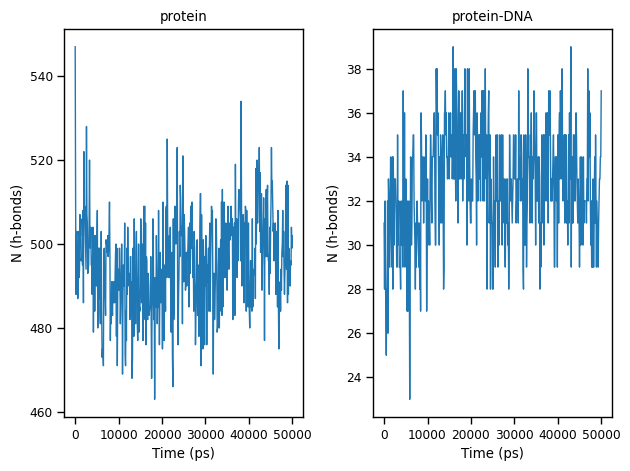

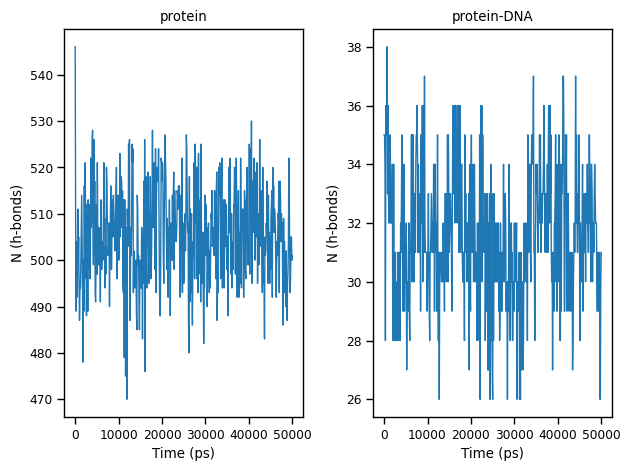

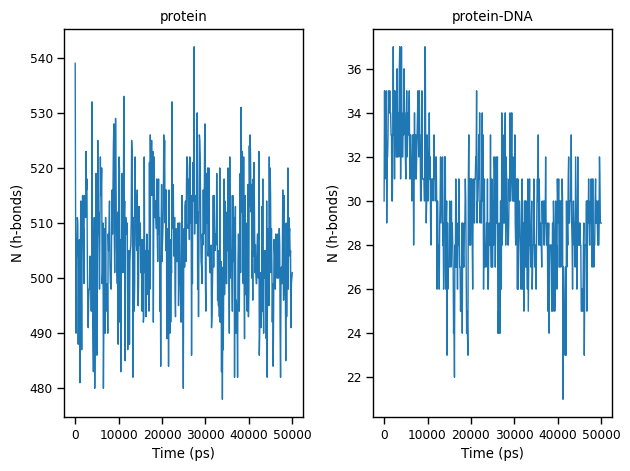

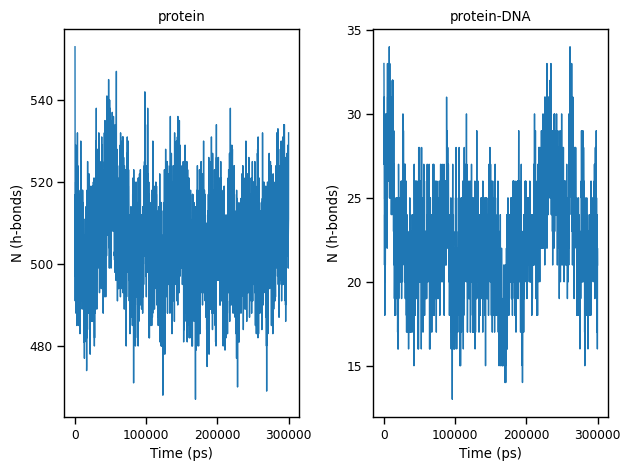

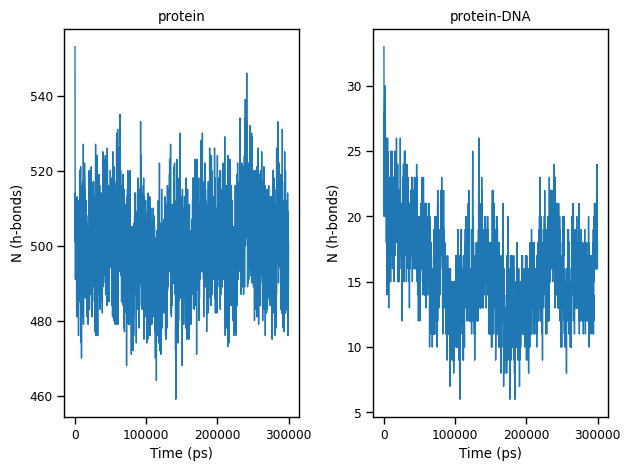

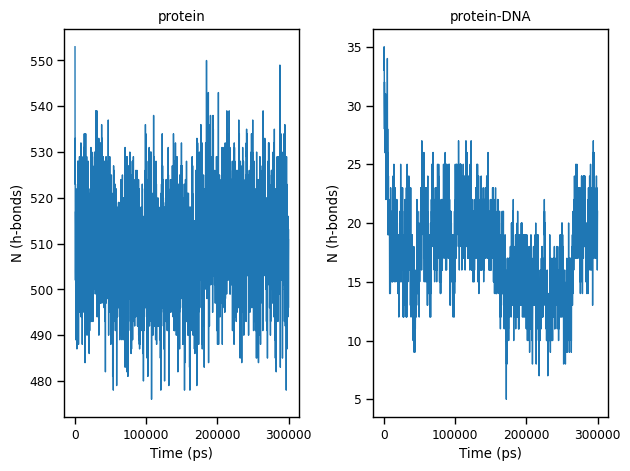

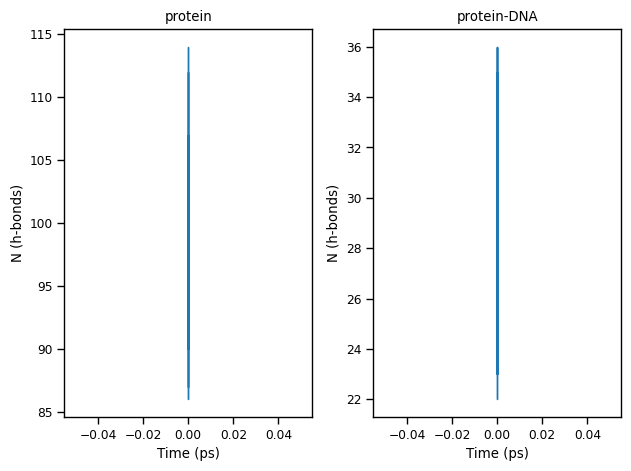

In [4]:
# read in all the data from PLUMED CV analysis for plotting
CVs = analysis_of_CVs.CVs_replicas(folder,3)
CVs["Simulation"]= ["MetaD, OSymL" for x in range(len(CVs))]
CVs_unbiased = analysis_of_CVs.CVs_replicas(folder_unbiases,5)
CVs_unbiased["Simulation"]= ["Unbiased, OSymL" for x in range(len(CVs_unbiased))]
NMR_CVs = analysis_of_CVs_NMR.CVs_replicas(folder_NMR_OSymL, 3, path_ana = "analysis/")
NMR_CVs["Simulation"]= ["NMR, OSymL" for x in range(len(NMR_CVs))]
CVs_all  = CVs.append([CVs_unbiased, NMR_CVs])

# read in the data from GROMACS h-bond analysis
hbonds_metaD = analysis_of_CVs_NMR.plot_hbonds(folder,3)
hbonds_metaD["Simulation"]= ["MetaD, OSymL" for x in range(len(hbonds_metaD))]
hbonds_ub = analysis_of_CVs_NMR.plot_hbonds(folder_unbiases,5)
hbonds_ub["Simulation"]= ["Unbiased, OSymL" for x in range(len(hbonds_ub))]
NMR_hbonds = analysis_of_CVs_NMR.plot_hbonds(folder_NMR_OSymL, 3, path_ana = "analysis/")
NMR_hbonds["Simulation"]= ["NMR, OSymL" for x in range(len(NMR_hbonds))]
hbonds_all = pd.concat([hbonds_metaD, hbonds_ub, NMR_hbonds])

# also read in the data from the NMR structure
CVs_NMR = analysis_of_CVs_NMR.CVs_replicas(folder_1osl, 1)
CVs_NMR["Simulation"] = ["NMR structures" for x in range(len(CVs_NMR))]
hbonds_NMR = analysis_of_CVs_NMR.plot_hbonds(folder_1osl, 1)

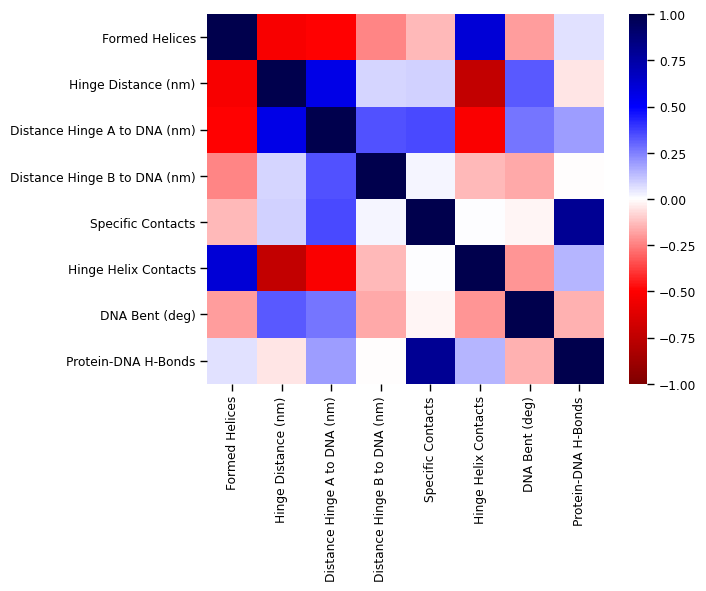

In [5]:
# Check the correlation between differen CVs + H-bonds 
CVs["Protein-DNA H-Bonds"]=hbonds_metaD["Protein-DNA H-Bonds"]
coor = CVs.drop(columns=["Time (ps)","Time (ns)","Replica","DNA bent (rad)","Contacts","Hinge DNA\nDistance (nm)"]).corr()
sns.heatmap(coor,cmap='seismic_r',vmin=-1, vmax=1)
plt.show()

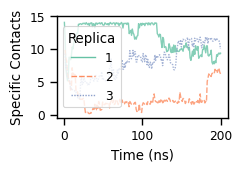

In [9]:
plt.subplots(figsize=(2.5,1.8))
#plt.subplots(figsize=(4.5,1.8))
sns.lineplot(data = CVs[::10], y = "Specific Contacts", x = "Time (ns)", alpha = 0.8, hue = "Replica", palette="Set2",\
            style="Replica")

plt.ylim(-0.5,15)
#plt.legend(markerscale=0.4, fontsize=8, title="Replica",  bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
#plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()
#
#plt.savefig("/home/x_mallu/mln_lf/EXP-22-BV4083/figures/SymL/specific/plots_Dec22/Specific_CRntacts.pdf", dpi=300)
plt.show()

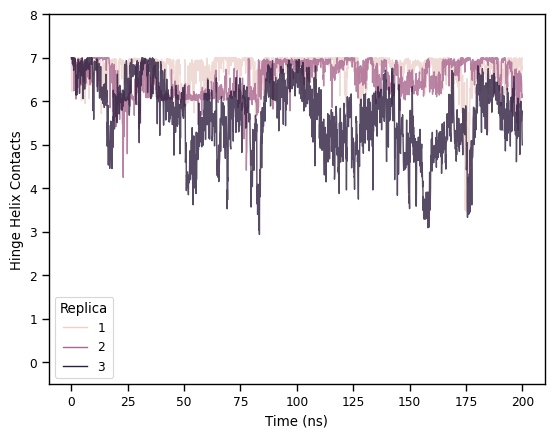

In [15]:
sns.lineplot(data = CVs[::1], y = "Hinge Helix Contacts", x = "Time (ns)", alpha = 0.8, hue = "Replica")
plt.ylim(-0.5,8)
#plt.xlim(0,1000*10**12)
plt.show()

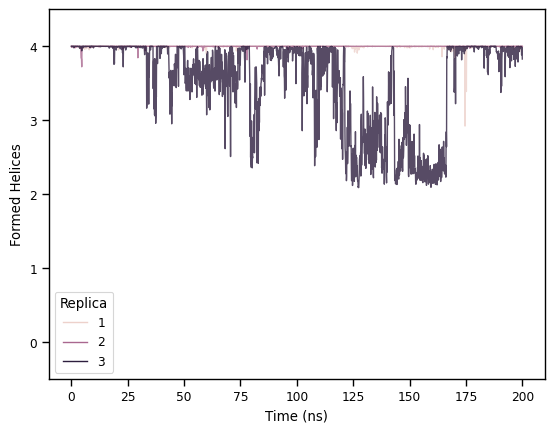

In [16]:
sns.lineplot(data = CVs[::1], y = "Formed Helices", x = "Time (ns)", alpha = 0.8, hue = "Replica")
plt.ylim(-0.5,4.5)
#plt.xlim(0,1000*10**12)
plt.show()

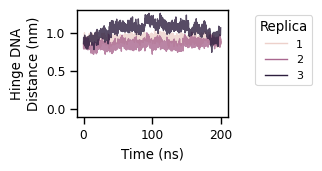

In [17]:
#plt.subplots(figsize=(2.5,1.8))
plt.subplots(figsize=(4.5,1.8))
sns.lineplot(data = CVs[::1], y = "Hinge DNA\nDistance (nm)", x = "Time (ns)", alpha = 0.8, hue = "Replica")
plt.ylim(-0.1,1.3)
plt.legend(markerscale=0.4, fontsize=8, title="Replica",  bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
#plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()
#plt.savefig("/home/x_mallu/mln_lf/EXP-22-BV4083/figures/SymL/specific/plots_Dec22/Hinge_DNA_dist_lg.pdf", dpi=300)
plt.show()

In [18]:
CVs_all

,Time (ps),Contacts,Formed Helices,DNA bent (rad),Hinge Distance (nm),Distance Hinge A to DNA (nm),Distance Hinge B to DNA (nm),Specific Contacts,Hinge Helix Contacts,DNA Bent (deg),Time (ns),Replica,Hinge DNA\nDistance (nm),Simulation
0,0.0,20.999477,3.999681,2.376497,0.956349,0.851199,0.835516,13.999499,6.999978,43.836752,0.0,1,0.851199,"MetaD, OSymL"
1,100.0,19.806985,3.999006,2.381144,0.990567,0.845132,0.857986,13.549714,6.257271,43.570498,0.1,1,0.845132,"MetaD, OSymL"
2,200.0,18.008093,3.999603,2.356631,0.968884,0.878127,0.829093,11.774816,6.233277,44.974990,0.2,1,0.878127,"MetaD, OSymL"
3,300.0,18.828788,3.998019,2.315390,0.982761,0.842519,0.846361,11.848468,6.980321,47.337925,0.3,1,0.842519,"MetaD, OSymL"
4,400.0,19.274751,3.999668,2.350225,0.991610,0.854677,0.854340,12.275390,6.999361,45.342027,0.4,1,0.854677,"MetaD, OSymL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,299600.0,8.558565,3.789830,2.411355,0.948328,0.862718,0.782267,2.221631,6.336933,41.839536,299.6,3,0.862718,"NMR, OSymL"
2997,299700.0,8.999481,3.391731,2.391020,0.960837,0.859271,0.799015,2.973093,6.026388,43.004645,299.7,3,0.859271,"NMR, OSymL"
2998,299800.0,8.852074,3.696802,2.351589,0.948702,0.832559,0.775523,2.742870,6.109203,45.263875,299.8,3,0.832559,"NMR, OSymL"
2999,299900.0,9.856650,3.617566,2.337710,0.939420,0.833533,0.777794,3.837877,6.018773,46.059083,299.9,3,0.833533,"NMR, OSymL"


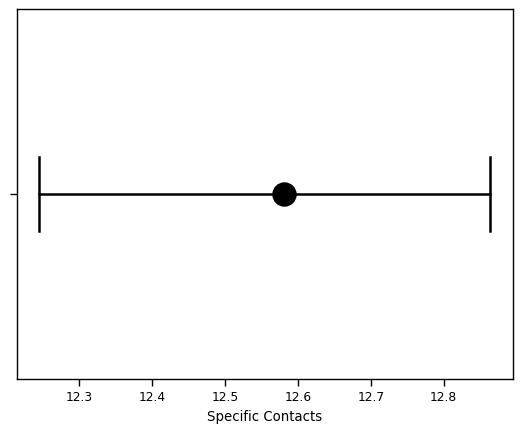

In [19]:
sns.pointplot( data=CVs_NMR, x="Specific Contacts", errorbar=('ci', 68), capsize=0.2, color='k', scale=3)
plt.show()

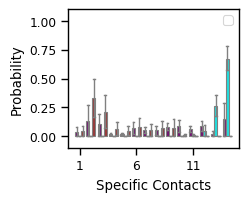

,Simulation,Probability,Specific Contacts
0,"Unbiased, OSymL",0.0,1
1,"Unbiased, OSymL",0.0,2
2,"Unbiased, OSymL",0.0,3
3,"Unbiased, OSymL",0.0,4
4,"Unbiased, OSymL",0.0,5
...,...,...,...
149,"NMR, OSymL",0.0,10
150,"NMR, OSymL",0.0,11
151,"NMR, OSymL",0.0,12
152,"NMR, OSymL",0.0,13


In [6]:
analysis_of_CVs.Write_Probability_Data_Frame(CVs_all,"Specific Contacts", np.arange(0,15,1))

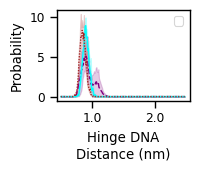

,Simulation,Probability,Hinge DNA\nDistance (nm)
0,"Unbiased, OSymL",0.0,0.50
1,"Unbiased, OSymL",0.0,0.51
2,"Unbiased, OSymL",0.0,0.52
3,"Unbiased, OSymL",0.0,0.53
4,"Unbiased, OSymL",0.0,0.54
...,...,...,...
2184,"NMR, OSymL",0.0,2.44
2185,"NMR, OSymL",0.0,2.45
2186,"NMR, OSymL",0.0,2.46
2187,"NMR, OSymL",0.0,2.47


In [12]:
analysis_of_CVs.Write_Probability_Data_Frame(CVs_all,"Hinge DNA\nDistance (nm)", np.arange(0.5,2.5,0.01), \
figure_path="/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/Figures/MetaD/OSymL_specific/",plot_t="line")

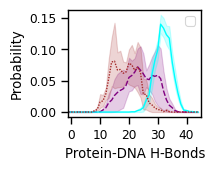

,Simulation,Probability,Protein-DNA H-Bonds
0,"Unbiased, OSymL",0.0,-1
1,"Unbiased, OSymL",0.0,0
2,"Unbiased, OSymL",0.0,1
3,"Unbiased, OSymL",0.0,2
4,"Unbiased, OSymL",0.0,3
...,...,...,...
501,"NMR, OSymL",0.0,40
502,"NMR, OSymL",0.0,41
503,"NMR, OSymL",0.0,42
504,"NMR, OSymL",0.0,43


In [11]:
analysis_of_CVs.Write_Probability_Data_Frame(hbonds_all, "Protein-DNA H-Bonds", np.arange(-1,46,1),\
                                             plot_t="line",\
figure_path="/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/Figures/MetaD/OSymL_specific/")

The RMSD has been analysed by aligning the protein core, the stable region of the complex. The DNA moves a lot with respect to this reference.

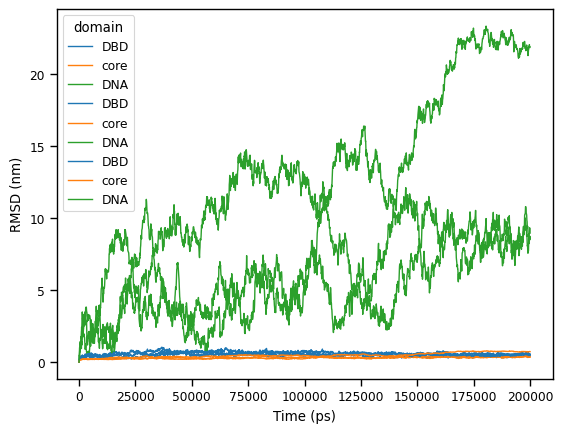

In [36]:
rmsd = plotting_gmx.plot_ana_rmsd(folder + "1/ana/" )
rmsd['replica'] = [1 for x in range(len(rmsd))]
rmsd["Time (ns)"] = rmsd["Time (ps)"]/1000
for i in [2,3]:
    rmsd_n = plotting_gmx.plot_ana_rmsd(folder+'{}/ana/'.format(i))
    rmsd_n['replica'] = [i for x in range(len(rmsd_n))]
    rmsd_n["Time (ns)"] = rmsd_n["Time (ps)"]/1000
    rmsd = rmsd.append(rmsd_n)
plt.show()

In [37]:
rmsd_DBD = rmsd[rmsd["domain"]=="DBD"]
rmsd_DNA = rmsd[rmsd["domain"]=="DNA"]
rmsd_core = rmsd[rmsd["domain"]=="core"]

In [38]:
rmsd_DBD

,Time (ps),RMSD (nm),domain,replica,Time (ns)
0,0.0,0.000503,DBD,1,0.0
1,100.0,0.169157,DBD,1,0.1
2,200.0,0.225438,DBD,1,0.2
3,300.0,0.240053,DBD,1,0.3
4,400.0,0.203504,DBD,1,0.4
...,...,...,...,...,...
1996,199600.0,0.570409,DBD,3,199.6
1997,199700.0,0.531692,DBD,3,199.7
1998,199800.0,0.575401,DBD,3,199.8
1999,199900.0,0.568751,DBD,3,199.9


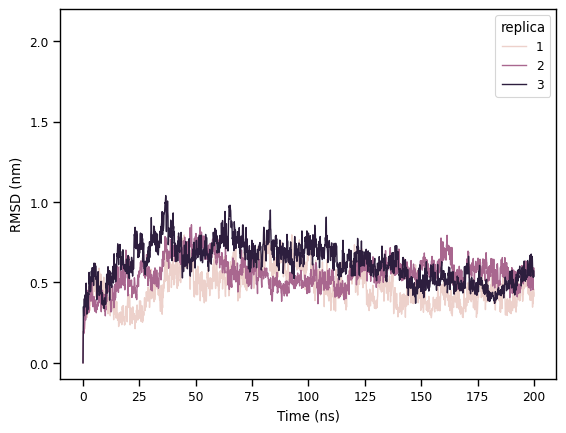

In [39]:
sns.lineplot(data = rmsd_DBD, x = "Time (ns)", y = "RMSD (nm)", hue = "replica")
plt.ylim(-0.1,2.2)
plt.show()

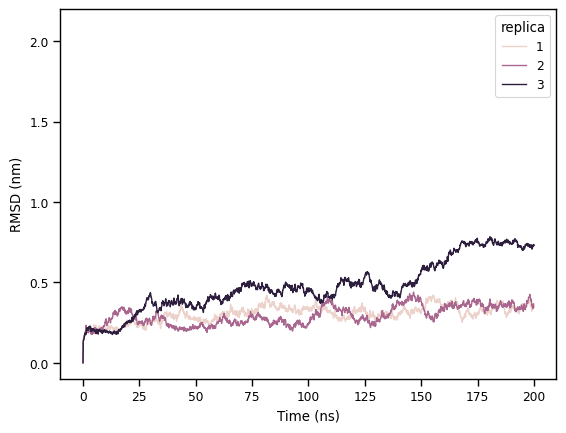

In [40]:
sns.lineplot(data = rmsd_core, x = "Time (ns)", y = "RMSD (nm)", hue = "replica")
plt.ylim(-0.1,2.2)
plt.show()

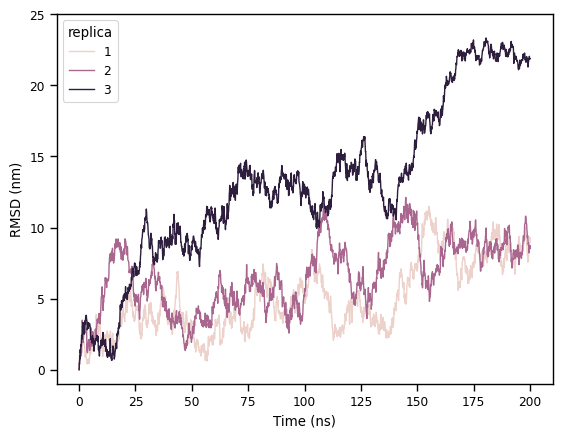

In [41]:
sns.lineplot(data = rmsd_DNA, x = "Time (ns)", y = "RMSD (nm)", hue = "replica")
plt.ylim(-1,25)
plt.show()

In [42]:
names=['A:Leu6', 'A:Tyr7', 'A:Tyr17', 'A:Gln18', 'A:Ser21', 'A:Arg22', 'A:His29'\
          ,'B:Leu6', 'B:Tyr7', 'B:Tyr17', 'B:Gln18', 'B:Ser21', 'B:Arg22', 'B:His29', 
           'Arg51', 'Val52', 'Ala53', 'Glu54', 'Glu55', 'Leu56',  'Ala57']
residue_dict = dict(zip(names, np.arange(0,len(names)+1,1)))
names_A = ['A:Leu6', 'A:Tyr7', 'A:Tyr17', 'A:Gln18', 'A:Ser21', 'A:Arg22', 'A:His29']
names_B = ['B:Leu6', 'B:Tyr7', 'B:Tyr17', 'B:Gln18', 'B:Ser21', 'B:Arg22', 'B:His29']
names_hinge= ['Arg51', 'Val52', 'Ala53', 'Glu54', 'Glu55', 'Leu56',  'Ala57']
residue_dict

def plot_cmap(residue_list, file = folder):
    """Plotting of all distances between contacts in the cmap CV.
    
    """
    
    df_distances = pd.read_csv(file + "distances", sep='\s+', skiprows=0)

    names = residue_list
    list_dist = []
    
    # find out what residues you are analysing add the data to your df for plotting
    
    start, end = residue_dict[residue_list[0]],residue_dict[residue_list[-1]]
    
    for (i,j) in zip( range(start,end+1,1), names):
        df = pd.DataFrame({ 'Time (ps)':  list(df_distances.iloc[:,0]), 'Protein Residues' : \
                           [j for x in range(len((df_distances.iloc[:,0])))],\
                           "Distance (nm)" : list(df_distances.iloc[:,i+1])})
        list_dist.append(df)
    
    df_all = pd.concat([df for df in list_dist])
    return(df_all)

def plot_cdist(names, replica):
    "plot the distances from different replicas"
    
    cmap = plot_cmap(names, folder+"{}/".format(replica))
    sns.lineplot(data = cmap, x = "Time (ps)", y = "Distance (nm)", hue = "Protein Residues")
    plt.show()
    
def plot_hist_cdist(names, replica):
    "Plot a histogram for the data from several replicas"
    
    cmap = []
    for i in np.arange(1,replica+1,1):
    
        cmap_N = plot_cmap(names, folder+"{}/".format(i))
        cmap_N["replica"] = [i for x in range(len(cmap_N))]
        cmap.append(cmap_N)
    cmap = pd.concat([df for df in cmap])
    sns.histplot(data = cmap, x = "Distance (nm)", hue = "Protein Residues", element="poly")
    plt.xlim(0.2,2.5)
    plt.show()

In [43]:
plot_cmap(names_A, folder+"1/")

,Time (ps),Protein Residues,Distance (nm)
0,0.0,A:Leu6,0.391790
1,100.0,A:Leu6,0.452556
2,200.0,A:Leu6,0.430413
3,300.0,A:Leu6,0.393799
4,400.0,A:Leu6,0.400919
...,...,...,...
1996,199600.0,A:His29,1.051389
1997,199700.0,A:His29,0.975057
1998,199800.0,A:His29,1.147003
1999,199900.0,A:His29,1.160322


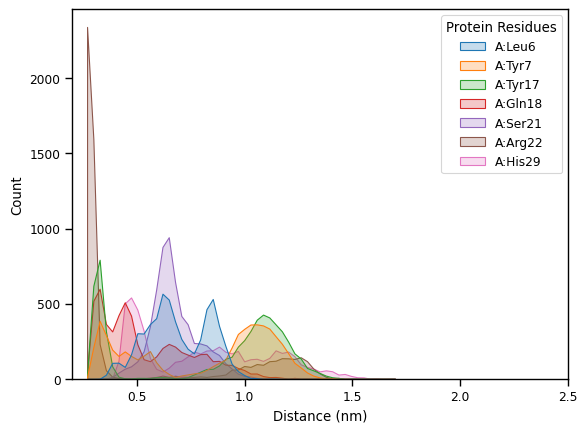

In [44]:
plot_hist_cdist(names_A,3)


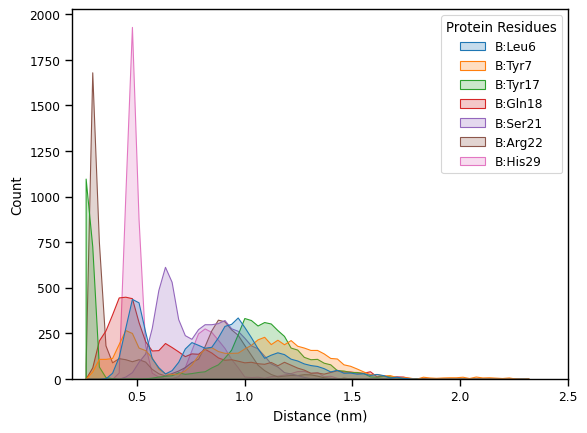

In [45]:
plot_hist_cdist(names_B,3)

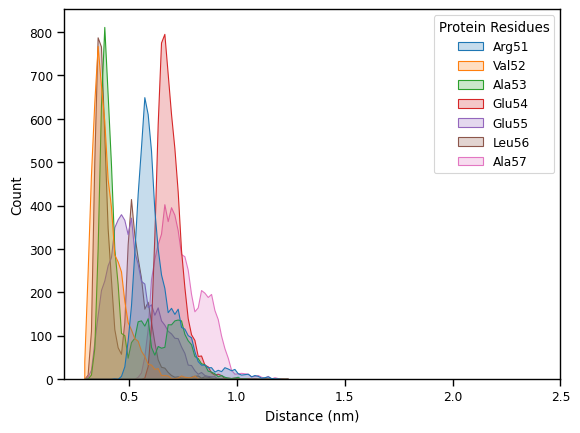

In [46]:
plot_hist_cdist(names_hinge,3)